In [2]:
import pandas as pd

df = pd.read_pickle("../Data/out.pkl")

df.head()


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM
871479,18,3000019,3000019,18_3000019,0.0,0.0,0.0,6
871482,18,3000023,3000023,18_3000023,0.0,0.0,0.0,7
871484,18,3000025,3000025,18_3000025,0.0,0.0,0.0,7
871492,18,3000040,3000040,18_3000040,4.0,0.0,0.0,10
871502,18,3000066,3000066,18_3000066,0.0,0.0,0.0,10


In [3]:
df["Majority"] = df["predict_state_SUM"] > 10
open_closed = df.groupby('Majority').count()
open_closed

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM
Majority,,,,,,,,
False,2200537,2200537,2200537,2200537,2200537,2200537,2200537,2200537
True,1901611,1901611,1901611,1901611,1901611,1901611,1901611,1901611


In [4]:
df["Majority"] = df["Majority"].astype(int)
majority = df["Majority"]
df["diffs"] = majority.diff()

regions = df[df["diffs"] != 0]
regions = regions.reset_index(drop = True)

extremes_start = regions["start"]
lenghts = extremes_start.diff()
open_region_lengths = lenghts[2::2]
closed_region_lengths = lenghts[1::2]
open_region_lengths[:50]


2       455.0
4       271.0
6       103.0
8       283.0
10     1001.0
12      244.0
14       89.0
16      121.0
18      246.0
20      259.0
22     1216.0
24      176.0
26      109.0
28      578.0
30      316.0
32      241.0
34      201.0
36      191.0
38      321.0
40      184.0
42      178.0
44      243.0
46      166.0
48      198.0
50       90.0
52      216.0
54       82.0
56      134.0
58      414.0
60      305.0
62      173.0
64       89.0
66      500.0
68       91.0
70       94.0
72      130.0
74      103.0
76      152.0
78      428.0
80      203.0
82      113.0
84       80.0
86       68.0
88       94.0
90       49.0
92      140.0
94      130.0
96       79.0
98      151.0
100     215.0
Name: start, dtype: float64

In [5]:
regions["lenght"] = regions["start"].diff().shift(-1)
regions["open"] = regions["diffs"] == 1

open_regions = regions[regions["open"] == True]
closed_regions = regions[regions["open"] == False]

open_regions.head()


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs,lenght,open
1,18,3002193,3002193,18_3002193,0.0,0.0,3.0,12,1,1.0,455.0,True
3,18,3003922,3003922,18_3003922,1.0,0.0,0.0,12,1,1.0,271.0,True
5,18,3004806,3004806,18_3004806,0.0,0.0,0.0,11,1,1.0,103.0,True
7,18,3005107,3005107,18_3005107,1.0,2.0,0.0,20,1,1.0,283.0,True
9,18,3005448,3005448,18_3005448,0.0,1.0,0.0,13,1,1.0,1001.0,True


In [6]:
print("PRIEŠ VALYMĄ")

short_open_regions = regions.loc[(regions['open'] == True) & (regions['lenght']  <= 75)]
short_closed_regions = regions.loc[(regions['open'] == False) & (regions['lenght']  <= 50)]

print(len(short_open_regions.index))
print(len(short_closed_regions.index))
print(len(regions.index))

PRIEŠ VALYMĄ
8887
3179
192151


In [7]:
regions = regions.drop(regions[(regions['open'] == True) & (regions['lenght']  <= 75)].index)
regions = regions.drop(regions[(regions['open'] == False) & (regions['lenght']  <= 50)].index)
regions = regions.drop(regions[(regions['open'] == regions['open'].shift(-1))].index)

regions["lenght"] = regions["start"].diff().shift(-1)



In [8]:
print("PO VALYMO")

short_open_regions = regions.loc[(regions['open'] == True) & (regions['lenght']  <= 75)]
short_closed_regions = regions.loc[(regions['open'] == False) & (regions['lenght']  <= 50)]

print(len(short_open_regions.index))
print(len(short_closed_regions.index))
print(len(regions.index))

PO VALYMO
0
0
168475


In [9]:
regions["end"] = regions["start"].shift(-1) - 1
regions["end"] = regions["end"].fillna(0).astype(int)

In [10]:
open_regions = regions[regions["open"] == True]
closed_regions = regions[regions["open"] == False]

print(open_region_lengths[:10])
open_regions.head()

2      455.0
4      271.0
6      103.0
8      283.0
10    1001.0
12     244.0
14      89.0
16     121.0
18     246.0
20     259.0
Name: start, dtype: float64


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs,lenght,open
1,18,3002193,3002647,18_3002193,0.0,0.0,3.0,12,1,1.0,455.0,True
3,18,3003922,3004192,18_3003922,1.0,0.0,0.0,12,1,1.0,271.0,True
5,18,3004806,3004908,18_3004806,0.0,0.0,0.0,11,1,1.0,103.0,True
7,18,3005107,3005389,18_3005107,1.0,2.0,0.0,20,1,1.0,283.0,True
9,18,3005448,3006448,18_3005448,0.0,1.0,0.0,13,1,1.0,1001.0,True


Medianos
224.0
353.0

Moda
0    94.0
dtype: float64
0    81.0
dtype: float64

Vidurkiai
398.46055771216925
641.4736398494723

Sumos
33565122.0
54035815.0

Frakcija
0.3831593947448302
0.6168406052551698


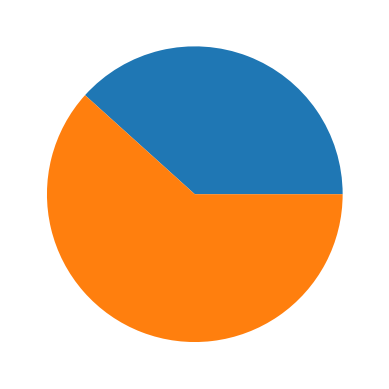

In [11]:
import matplotlib.pyplot as plt

print("Medianos")
print(open_regions["lenght"].median())
print(closed_regions["lenght"].median())

print("\nModa")
print(open_regions["lenght"].mode())
print(closed_regions["lenght"].mode())

print("\nVidurkiai")
print(open_regions["lenght"].mean())
print(closed_regions["lenght"].mean())

print("\nSumos")
s1 = open_regions["lenght"].sum()
print(s1)
s2 = closed_regions["lenght"].sum()
print(s2)

print("\nFrakcija")
print(s1/(s1+s2))
print(s2/(s1+s2))

plt.pie([s1, s2])
plt.show()

<BarContainer object of 2 artists>

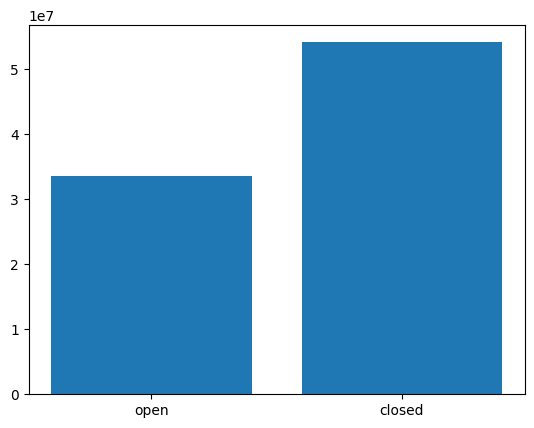

In [12]:
plt.bar(["open", "closed"], [s1, s2])

In [13]:
df

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs
871479,18,3000019,3000019,18_3000019,0.0,0.0,0.0,6,0,NaN
871482,18,3000023,3000023,18_3000023,0.0,0.0,0.0,7,0,0.0
871484,18,3000025,3000025,18_3000025,0.0,0.0,0.0,7,0,0.0
871492,18,3000040,3000040,18_3000040,4.0,0.0,0.0,10,0,0.0
871502,18,3000066,3000066,18_3000066,0.0,0.0,0.0,10,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4061463,18,90601940,90601940,18_90601940,0.0,0.0,0.0,0,0,0.0
4061464,18,90601946,90601946,18_90601946,0.0,0.0,0.0,0,0,0.0
4061465,18,90601952,90601952,18_90601952,0.0,0.0,0.0,0,0,0.0
4061466,18,90601957,90601957,18_90601957,0.0,0.0,0.0,0,0,0.0


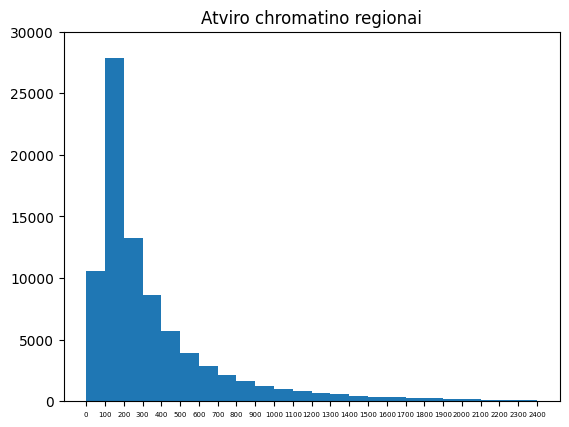

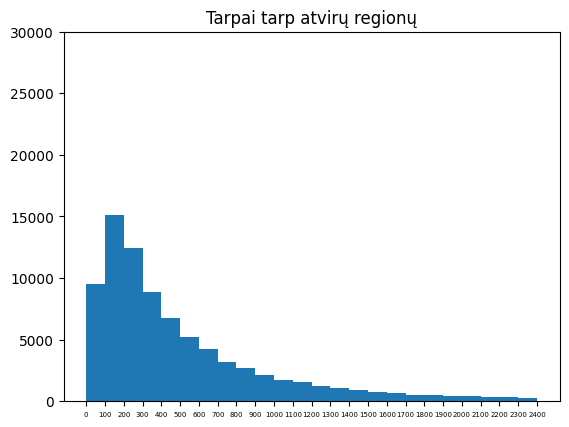

In [14]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, 2500, step=100)

plt.hist(open_regions["lenght"], bins=bins, range=(-50, 2000))
plt.title("Atviro chromatino regionai")
plt.xticks(bins, fontsize = 5)

axes = plt.gca()
axes.set_ylim([0,30000])
plt.show()

plt.hist(closed_regions["lenght"], bins=bins, range=(-50, 2000))
plt.title("Tarpai tarp atvirų regionų")
plt.xticks(bins, fontsize = 5)
axes = plt.gca()
axes.set_ylim([0,30000])
plt.show()

In [15]:
import pyreadr

result = pyreadr.read_r('../Data/ATAC_dt.RDS')
atac = result[None]
print(atac.head())

  seqnames    start      end  width strand    study
0        1  3062536  3063132    597      *  ATACseq
1        1  3482735  3483063    329      *  ATACseq
2        1  3549538  3549654    117      *  ATACseq
3        1  3649136  3649335    200      *  ATACseq
4        1  3670656  3672554   1899      *  ATACseq


Medianos
246.0

Moda
0    104
dtype: int32

Vidurkiai
339.16451024133033

Sumos
16724202


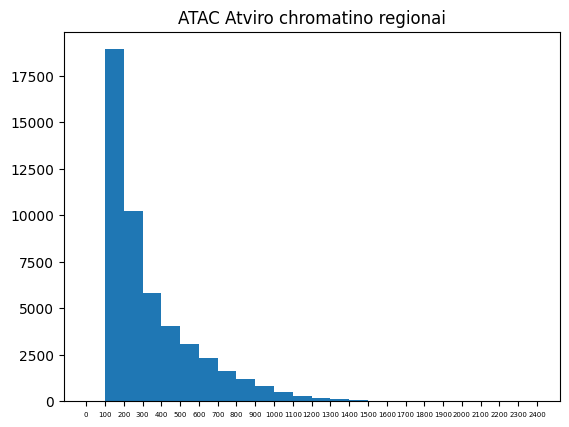

In [16]:
atac_lengths = atac['width']

print("Medianos")
print(atac_lengths.median())

print("\nModa")
print(atac_lengths.mode())

print("\nVidurkiai")
print(atac_lengths.mean())

print("\nSumos")
s1 = atac_lengths.sum()
print(s1)

plt.hist(atac_lengths, bins=bins, range=(-50, 1000))
plt.title("ATAC Atviro chromatino regionai")
plt.xticks(bins, fontsize = 5)
plt.show()

In [17]:
import pyreadr

result = pyreadr.read_r('../Data/DNAseq_dt.RDS')
dnaseq = result[None]
print(dnaseq.head())

  seqnames    start      end  width strand   study
0        1  3062584  3062721    138      *  DNAseq
1        1  3062853  3063133    281      *  DNAseq
2        1  3343577  3343809    233      *  DNAseq
3        1  3445798  3445915    118      *  DNAseq
4        1  3445996  3446201    206      *  DNAseq


Medianos
208.0

Moda
0    102
dtype: int32

Vidurkiai
279.0600486049159

Sumos
27214215


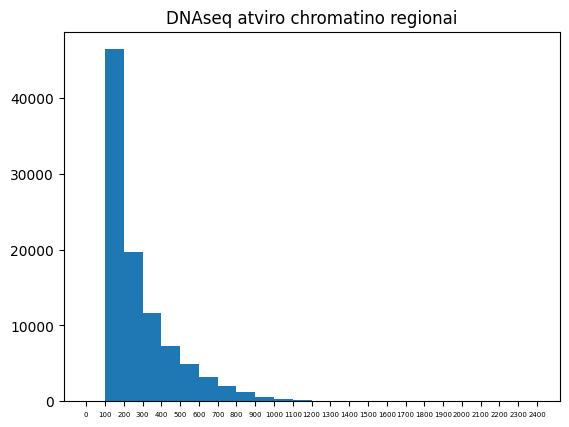

In [18]:
dnaseq_lengths = dnaseq['width']

print("Medianos")
print(dnaseq_lengths.median())

print("\nModa")
print(dnaseq_lengths.mode())

print("\nVidurkiai")
print(dnaseq_lengths.mean())

print("\nSumos")
s1 = dnaseq_lengths.sum()
print(s1)

plt.hist(dnaseq_lengths, bins=bins, range=(-50, 1000))
plt.title("DNAseq atviro chromatino regionai")
plt.xticks(bins, fontsize = 5)
plt.show()


In [19]:
open_regions.head()

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs,lenght,open
1,18,3002193,3002647,18_3002193,0.0,0.0,3.0,12,1,1.0,455.0,True
3,18,3003922,3004192,18_3003922,1.0,0.0,0.0,12,1,1.0,271.0,True
5,18,3004806,3004908,18_3004806,0.0,0.0,0.0,11,1,1.0,103.0,True
7,18,3005107,3005389,18_3005107,1.0,2.0,0.0,20,1,1.0,283.0,True
9,18,3005448,3006448,18_3005448,0.0,1.0,0.0,13,1,1.0,1001.0,True


In [38]:
#PRE
to_array_pre = open_regions["start"]
from_array_pre = to_array_pre - 100

bins_pre = pd.IntervalIndex.from_arrays(from_array_pre, to_array_pre, closed="left")
print(bins_pre)

#POST
from_array_post = open_regions["end"]
to_array_post = from_array_post + 100

bins_post = pd.IntervalIndex.from_arrays(from_array_post, to_array_post, closed="left")
print(bins_post)

#OPEN
from_array_open = open_regions["start"]
to_array_open = open_regions["end"]

bins_open = pd.IntervalIndex.from_arrays(from_array_open, to_array_open, closed="left")
print(bins_open)

IntervalIndex([[3002093, 3002193), [3003822, 3003922), [3004706, 3004806), [3005007, 3005107), [3005348, 3005448) ... [90597607, 90597707), [90598747, 90598847), [90599412, 90599512), [90599634, 90599734), [90600777, 90600877)],
              closed='left',
              dtype='interval[int64]')
IntervalIndex([[3002647, 3002747), [3004192, 3004292), [3004908, 3005008), [3005389, 3005489), [3006448, 3006548) ... [90597803, 90597903), [90598959, 90599059), [90599601, 90599701), [90599866, 90599966), [90600955, 90601055)],
              closed='left',
              dtype='interval[int64]')
IntervalIndex([[3002193, 3002647), [3003922, 3004192), [3004806, 3004908), [3005107, 3005389), [3005448, 3006448) ... [90597707, 90597803), [90598847, 90598959), [90599512, 90599601), [90599734, 90599866), [90600877, 90600955)],
              closed='left',
              dtype='interval[int64]')


In [41]:
import pyreadr

result = pyreadr.read_r('../Data/exampleForLukas.RDS')
df = result[None]
print(df.head())
print()



  seqnames     start       end        CG_ID  TT_S0  TT_S1  TT_S2
0       18  10000018  10000018  18_10000018    0.0    0.0    0.0
1       18  10000117  10000117  18_10000117    0.0    0.0    0.0
2       18  10000155  10000155  18_10000155    0.0    0.0    1.0
3       18  10000222  10000222  18_10000222    0.0    4.0    0.0
4       18  10000281  10000281  18_10000281    0.0    0.0    0.0



In [91]:
df["open_bin"] = pd.cut(df['start'], bins=bins_open)
df["pre_bin"] = pd.cut(df['start'], bins=bins_pre)
df["post_bin"] = pd.cut(df['start'], bins=bins_post)

print(df.tail())

        seqnames     start       end        CG_ID  TT_S0  TT_S1  TT_S2 open_bin pre_bin post_bin
4061463       18  90601940  90601940  18_90601940    0.0    0.0    0.0      NaN     NaN      NaN
4061464       18  90601946  90601946  18_90601946    0.0    0.0    0.0      NaN     NaN      NaN
4061465       18  90601952  90601952  18_90601952    0.0    0.0    0.0      NaN     NaN      NaN
4061466       18  90601957  90601957  18_90601957    0.0    0.0    0.0      NaN     NaN      NaN
4061467       18  90601969  90601969  18_90601969    1.0    0.0    0.0      NaN     NaN      NaN


In [92]:
pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_rows = 200
print(df[0:10])

        seqnames    start      end       CG_ID  TT_S0  TT_S1  TT_S2 open_bin pre_bin post_bin
5041857       19  3000017  3000017  19_3000017    0.0    0.0    0.0      NaN     NaN      NaN
871479        18  3000019  3000019  18_3000019    0.0    0.0    0.0      NaN     NaN      NaN
871482        18  3000023  3000023  18_3000023    0.0    0.0    0.0      NaN     NaN      NaN
871484        18  3000025  3000025  18_3000025    0.0    0.0    0.0      NaN     NaN      NaN
871492        18  3000040  3000040  18_3000040    4.0    0.0    0.0      NaN     NaN      NaN
871502        18  3000066  3000066  18_3000066    0.0    0.0    0.0      NaN     NaN      NaN
871510        18  3000085  3000085  18_3000085    0.0    0.0    0.0      NaN     NaN      NaN
871511        18  3000086  3000086  18_3000086    3.0    0.0    0.0      NaN     NaN      NaN
871515        18  3000088  3000088  18_3000088    0.0    0.0    0.0      NaN     NaN      NaN
5041902       19  3000089  3000089  19_3000089    0.0    0.0

In [93]:
df = df.sort_values(by='start')
print(df[200:250])
print(df.dtypes)
print(df['start'].min())

        seqnames    start      end       CG_ID  TT_S0  TT_S1  TT_S2                open_bin                 pre_bin post_bin
5042950       19  3001824  3001824  19_3001824    0.0    0.0    0.0                     NaN                     NaN      NaN
872551        18  3001831  3001831  18_3001831    0.0    0.0    0.0                     NaN                     NaN      NaN
5042958       19  3001835  3001835  19_3001835    0.0    0.0    0.0                     NaN                     NaN      NaN
5042968       19  3001860  3001860  19_3001860    0.0    0.0    0.0                     NaN                     NaN      NaN
872565        18  3001863  3001863  18_3001863    0.0    0.0    0.0                     NaN                     NaN      NaN
5042983       19  3001894  3001894  19_3001894    0.0    0.0    0.0                     NaN                     NaN      NaN
5042988       19  3001902  3001902  19_3001902    0.0    0.0    0.0                     NaN                     NaN      NaN


In [94]:
open = df.groupby('open_bin').sum()
pre = df.groupby('pre_bin').sum()
post = df.groupby('post_bin').sum()


In [95]:
print(open.head())
print(post.head())
print(pre.head())

                          start          end  TT_S0  TT_S1  TT_S2
open_bin                                                         
[3002193, 3002647)  144115331.0  144115331.0   36.0   20.0    6.0
[3003922, 3004192)   63084797.0   63084797.0    8.0    1.0    2.0
[3004806, 3004908)   33053433.0   33053433.0   10.0    0.0    0.0
[3005107, 3005389)   99173194.0   99173194.0   91.0   32.0   17.0
[3005448, 3006448)  312612936.0  312612936.0  976.0  339.0  228.0
                         start         end  TT_S0  TT_S1  TT_S2
post_bin                                                       
[3002647, 3002747)  24021565.0  24021565.0    0.0    0.0    0.0
[3004192, 3004292)  24033917.0  24033917.0    3.0    4.0    3.0
[3004908, 3005008)  18029691.0  18029691.0    3.0    2.0    1.0
[3005389, 3005489)  33059914.0  33059914.0   18.0    6.0    9.0
[3006448, 3006548)  18038819.0  18038819.0    0.0    0.0    0.0
                         start         end  TT_S0  TT_S1  TT_S2
pre_bin                   

In [111]:
surround = pre.reset_index()
surround['end'] = post['end'].reset_index(drop=True)
print(surround)

surround['TT_S0'] = pre['TT_S0'].reset_index() + post['TT_S0'].reset_index()
surround['TT_S1'] = pre['TT_S1'].reset_index() + post['TT_S1'].reset_index()
surround['TT_S2'] = pre['TT_S2'].reset_index() + post['TT_S2'].reset_index()

print(surround.head())
print(post.head())
print(pre.head())


                    pre_bin        start          end  TT_S0  TT_S1  TT_S2
0        [3002093, 3002193)   27019235.0   24021565.0    0.0    0.0    0.0
1        [3003822, 3003922)   33042591.0   24033917.0    0.0    1.0    0.0
2        [3004706, 3004806)   33052303.0   18029691.0    0.0    0.0    0.0
3        [3005007, 3005107)    3005062.0   33059914.0    0.0    0.0    0.0
4        [3005348, 3005448)   27048469.0   18038819.0    0.0    0.0    0.0
...                     ...          ...          ...    ...    ...    ...
84232  [90597607, 90597707)  181195259.0  362391412.0    1.0   13.0    0.0
84233  [90598747, 90598847)  271796404.0   90598960.0    1.0    3.0    0.0
84234  [90599412, 90599512)   90599467.0  362398515.0    1.0    0.0    0.0
84235  [90599634, 90599734)  362398725.0  452999530.0    0.0    0.0    0.0
84236  [90600777, 90600877)  181201596.0  271802954.0    0.0    1.0    0.0

[84237 rows x 6 columns]
              pre_bin       start         end  TT_S0  TT_S1  TT_S2
0  [300

In [118]:
# open = open.reset_index()

print(open.head())
print(surround.head())

open["surround_signal"] = surround['TT_S0']
open.drop('TT_S1', axis=1, inplace=True)
open.drop('TT_S2', axis=1, inplace=True)

   index            open_bin        start          end  TT_S0  ratio  surround_signal
0      0  [3002193, 3002647)  144115331.0  144115331.0   36.0    1.0              0.0
1      1  [3003922, 3004192)   63084797.0   63084797.0    8.0    1.0              3.0
2      2  [3004806, 3004908)   33053433.0   33053433.0   10.0    1.0              3.0
3      3  [3005107, 3005389)   99173194.0   99173194.0   91.0    1.0             18.0
4      4  [3005448, 3006448)  312612936.0  312612936.0  976.0    1.0              0.0
              pre_bin       start         end  TT_S0  TT_S1  TT_S2
0  [3002093, 3002193)  27019235.0  24021565.0    0.0    0.0    0.0
1  [3003822, 3003922)  33042591.0  24033917.0    3.0    5.0    3.0
2  [3004706, 3004806)  33052303.0  18029691.0    3.0    2.0    1.0
3  [3005007, 3005107)   3005062.0  33059914.0   18.0    6.0    9.0
4  [3005348, 3005448)  27048469.0  18038819.0    0.0    0.0    0.0


KeyError: "['TT_S1'] not found in axis"

In [140]:
open["ratio"] = open['TT_S0'] / open['surround_signal']

print(open[0:100])

open["ratio"].describe()

    index            open_bin         start           end  TT_S0      ratio  surround_signal
0       0  [3002193, 3002647)  1.441153e+08  1.441153e+08   36.0        inf              0.0
1       1  [3003922, 3004192)  6.308480e+07  6.308480e+07    8.0   2.666667              3.0
2       2  [3004806, 3004908)  3.305343e+07  3.305343e+07   10.0   3.333333              3.0
3       3  [3005107, 3005389)  9.917319e+07  9.917319e+07   91.0   5.055556             18.0
4       4  [3005448, 3006448)  3.126129e+08  3.126129e+08  976.0        inf              0.0
5       5  [3006632, 3006875)  5.412119e+07  5.412119e+07    7.0   7.000000              1.0
6       6  [3006980, 3007068)  3.007014e+07  3.007014e+07    8.0   8.000000              1.0
7       7  [3008020, 3008140)  4.211298e+07  4.211298e+07    9.0   2.250000              4.0
8       8  [3008678, 3008923)  5.114869e+07  5.114869e+07    9.0   3.000000              3.0
9       9  [3009001, 3009259)  1.263824e+08  1.263824e+08   25.0  12.5

count    8.423700e+04
mean              inf
std               NaN
min      7.812500e-02
25%      2.333333e+00
50%      6.100000e+00
75%      2.200000e+01
max               inf
Name: ratio, dtype: float64

count    72556.000000
mean        12.340775
std         28.386156
min          0.078125
25%          2.000000
50%          4.750000
75%         11.833333
max        917.000000
Name: ratio, dtype: float64


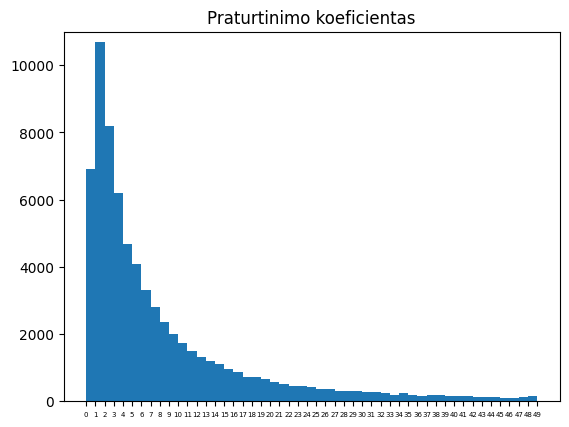

In [139]:
ratios = open["ratio"].copy()

ratios.replace([np.inf, -np.inf], np.nan, inplace=True)
ratios.dropna()
print(ratios.describe())

bins = np.arange(0, 50, step=1)
plt.hist(ratios, bins=bins, range=(0, 50))
plt.title("Praturtinimo koeficientas")
plt.xticks(bins, fontsize = 5)
axes = plt.gca()
axes.set_ylim([0,11000])
plt.show()

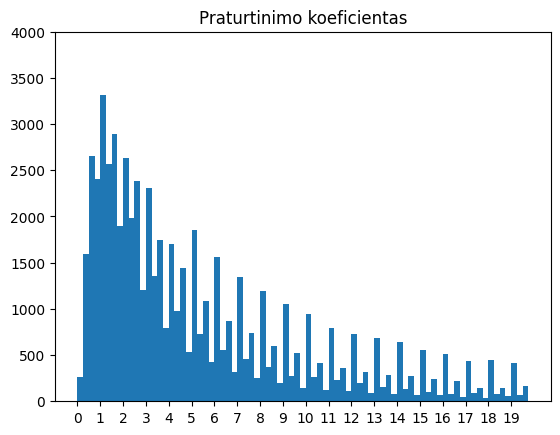

In [146]:
bins = np.arange(0, 20, step=0.25)
xbins = np.arange(0, 20, step=1)
plt.hist(ratios, bins=bins, range=(0, 20))
plt.title("Praturtinimo koeficientas")
plt.xticks(xbins, fontsize = 10)
axes = plt.gca()
axes.set_ylim([0,4000])
plt.show()